In [8]:
import numpy as np
from matplotlib import pyplot

In [ ]:
class particle(object):
    
    def __init__(self, mass=1., y=0., v=0.):
        self.mass = mass
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt

-77.41999071370955


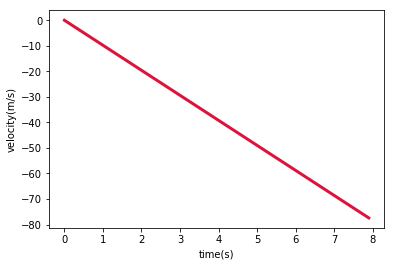

In [17]:
g = 9.8            
mass = 0.01     
y0 = 300.          
v0 = 0.         
vt = 30.           
R = 637100           
dt = 0.1           
p = particle(mass, y0, v0)

y = [y0] 
v = [v0] 
t = [0.]

while p.y > 0.:
    
    gforce = mass*g / (1+(p.y/R)**2) #Gravitational force depends on y 
    fy = -gforce
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

#for i in range(0,t_data.size):
#    print (i,t_data[i], y_data[i], v_data[i])

pyplot.plot(t_data, v_data, color="#DC143C", ls='-', lw=3)
pyplot.xlabel('time(s)')
pyplot.ylabel('velocity(m/s)');

v_f = v_data[len(v_data)-1] 

print(v_f)

In [34]:
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
R = 6371000
v0 = 0.            # initial velocity
yl=100000
yh = 150000
y0 = np.linspace(yl,yh,100)
dt = 0.05           # time step
gforce = lambda y: g*mass/(1+y/R)**2    # weight as a function of height
gforce2 = lambda y: g*mass

vf = []
vf2 = []

for k in range(0,100):
    p = particle(mass, y0[k], v0)
    p2 = particle(mass,y0[k],v0)
    y = [y0[k]]
    y2 = [y0[k]] # since we do not know the size of the arrays, we define first a python list
    v = [v0] # the append method is more efficient for lists than arrays
    v2 = [v0]
    t = [0.]
    t2 = [0.]

    while p.y > 0.:
        fy = -gforce(p.y)#-k2*p.v*abs(p.v)
        p.euler(fy, dt)
        y.append(p.y)
        v.append(p.v)
        t.append(t[-1]+dt)
    while p2.y > 0.:
        fy2 = -gforce2(p2.y)
        p2.euler(fy2, dt)
        y2.append(p2.y)
        v2.append(p2.v)
        t2.append(t2[-1]+dt)
    
    vf=v[-1]
    vf2=v2[-1]
    diff = abs((vf2-vf)/vf)
    
    if (diff>=0.01):
        break

print(y0[k])
print(diff)
print(vf)
print(vf2)

126767.67676767676
0.01000659918612706
-1561.1977201640493
-1576.8200000000263
